# Assignment 5 Data Analytics II

## Importing Reguired Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Preprocessing

In [4]:
df.isnull().sum().sort_values(ascending=False)

Purchased          0
EstimatedSalary    0
Age                0
Gender             0
User ID            0
dtype: int64

In [5]:
df.Purchased.unique()

array([0, 1])

In [6]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [9]:
print('Our data set contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))


Our data set contains 400 rows and 5 columns


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
df['Gender'].replace(['Female','Male'],[0,1],inplace=True)

<AxesSubplot:>

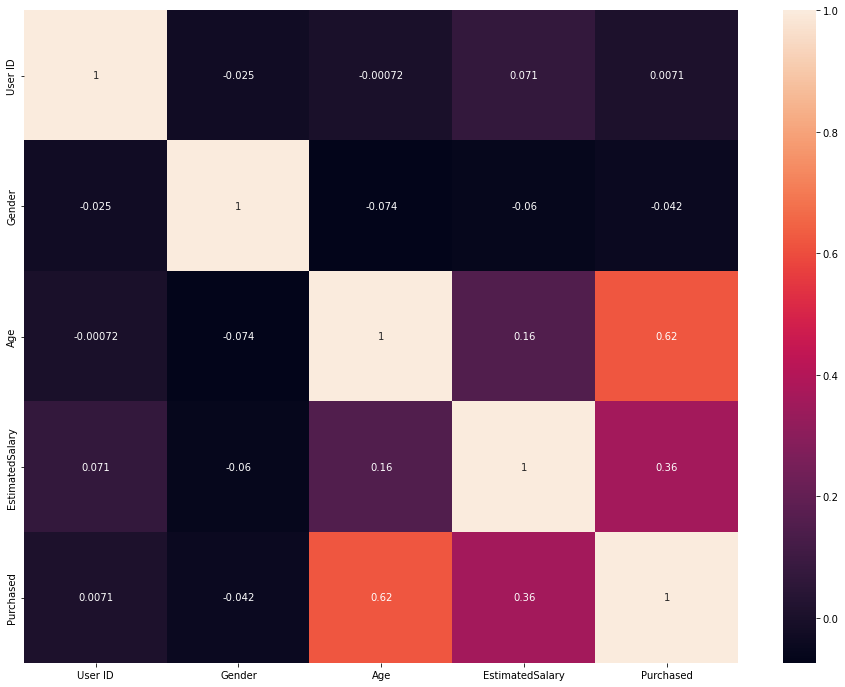

In [12]:
!pip install seaborn
import seaborn as sns
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Age'>

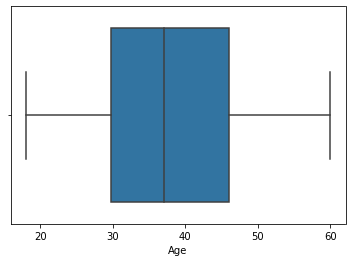

In [13]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='EstimatedSalary'>

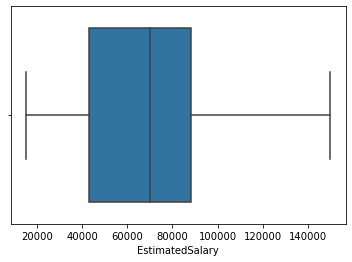

In [14]:
sns.boxplot(df['EstimatedSalary'])

## Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['Age','EstimatedSalary']])
df[['Age','EstimatedSalary']] = scaler.transform(df[['Age','EstimatedSalary']])

In [16]:
X=df[['Age','EstimatedSalary']]
y=df[['Purchased']]

## Splitting data into training and testing data

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)
print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (320, 2)
xtest shape  :  (80, 2)
ytrain shape :  (320, 1)
ytest shape  :  (80, 1)


## Building Logistic Regression Model

In [18]:
logreg=LogisticRegression()

In [19]:
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [20]:
ypred=logreg.predict(xtest)

## Accuracy

In [21]:
acc=logreg.score(xtest,ytest)

## Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest, ypred)

tp=confusion_matrix[0][0]
fp=confusion_matrix[0][1]
fn=confusion_matrix[1][0]
tn=confusion_matrix[1][1]

print("TP: ",tp)
print("FP: ",fp)
print("FN: ",fn)
print("TN: ",tn)

TP:  58
FP:  0
FN:  6
TN:  16


## Computing Accuracy,error rate,precision,recall

In [25]:
print('Accuracy:',acc)
errorRate=1-acc
print('Error Rate:{:.3f}'.format(errorRate))
precision = tp/(tp+fp)
print('Precision:',precision)
recall=tp/(tp+fn)
print('Recall:{:.3f}  '.format(recall))

Accuracy: 0.925
Error Rate:0.075
Precision: 1.0
Recall:0.906  


In [24]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80

